In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = sns.load_dataset('iris')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
dummy_dataset = pd.get_dummies(df['species'],drop_first=True)

In [19]:
dummy_dataset.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [20]:
df = pd.concat([df,dummy_dataset],axis=1)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [22]:
df = df.drop(columns='species')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [24]:
Versicolor_data = df.drop(columns='virginica')
Virginica_data = df.drop(columns='versicolor')

In [25]:
Versicolor_data.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
Virginica_data[Virginica_data['virginica'] > 0].head()

,sepal_length,sepal_width,petal_length,petal_width,virginica
100,6.3,3.3,6.0,2.5,1
101,5.8,2.7,5.1,1.9,1
102,7.1,3.0,5.9,2.1,1
103,6.3,2.9,5.6,1.8,1
104,6.5,3.0,5.8,2.2,1


In [27]:
X_versi = Versicolor_data.iloc[:,:-1]
y_versi = Versicolor_data.iloc[:,-1]

In [28]:
    X_versi.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


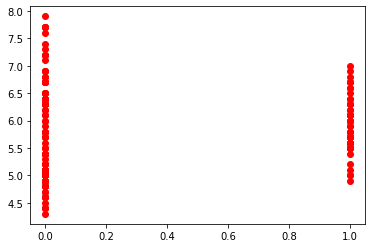

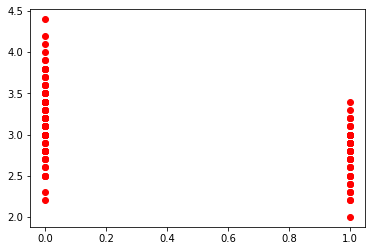

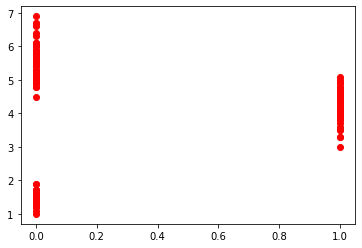

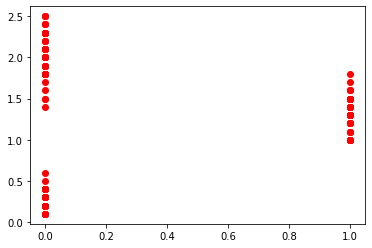

In [29]:
#EDA

for col in X_versi.columns:
    plt.plot(y_versi,X_versi[col],'ro')
    plt.show()

    

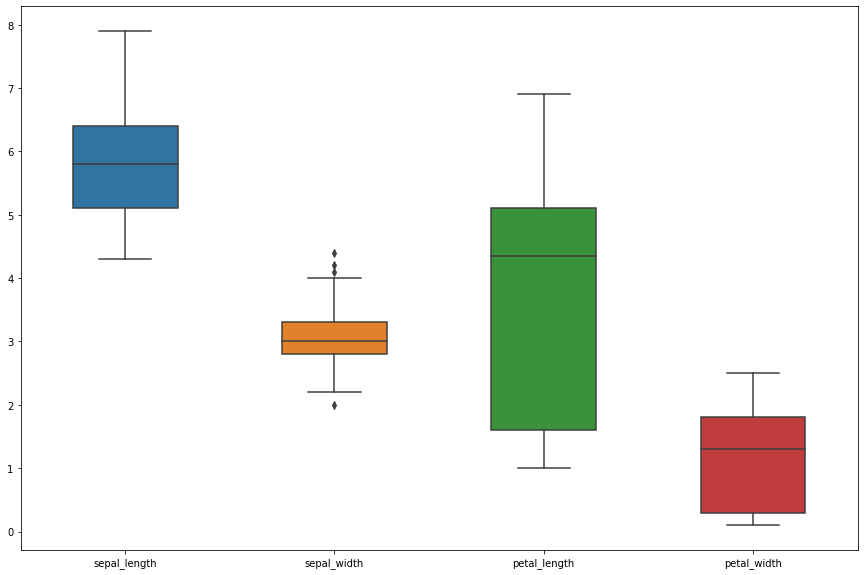

In [30]:
    
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=X_versi,ax=ax,width=0.5)

In [31]:
# fit model for Versicolor 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_versi,y_versi,test_size=.2,random_state=100)

In [32]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logistic_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
Versicolor_Probability = logistic_reg.predict_proba(x_test)

In [35]:
Versicolor_Probability

array([[0.50897218, 0.49102782],
       [0.83719633, 0.16280367],
       [0.28337529, 0.71662471],
       [0.98117226, 0.01882774],
       [0.48091691, 0.51908309],
       [0.58744286, 0.41255714],
       [0.95410922, 0.04589078],
       [0.71579038, 0.28420962],
       [0.5498612 , 0.4501388 ],
       [0.73621129, 0.26378871],
       [0.89225465, 0.10774535],
       [0.77486406, 0.22513594],
       [0.86276036, 0.13723964],
       [0.85153804, 0.14846196],
       [0.70604588, 0.29395412],
       [0.54269271, 0.45730729],
       [0.19671515, 0.80328485],
       [0.59400046, 0.40599954],
       [0.33057337, 0.66942663],
       [0.6228005 , 0.3771995 ],
       [0.57962127, 0.42037873],
       [0.86884253, 0.13115747],
       [0.39058579, 0.60941421],
       [0.77301808, 0.22698192],
       [0.34881854, 0.65118146],
       [0.60688463, 0.39311537],
       [0.60300969, 0.39699031],
       [0.82834295, 0.17165705],
       [0.41017315, 0.58982685],
       [0.73164418, 0.26835582]])

In [36]:
X_virgi = Virginica_data.iloc[:,:-1]
y_virgi = Virginica_data.iloc[:,-1]

In [37]:
y_virgi.shape

(150,)

In [38]:
# fit model for virginica

from sklearn.model_selection import train_test_split

x_train_virgi,x_test_virgi,y_train_virgi,y_test_virgi = train_test_split(X_virgi,y_virgi,test_size=.2,random_state=100)


In [39]:
from sklearn.linear_model import LogisticRegression

VirginicaLogReg = LogisticRegression()

In [40]:
VirginicaLogReg.fit(x_train_virgi,y_train_virgi)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Virginica_probability = VirginicaLogReg.predict_proba(x_test_virgi)
Virginica_probability

array([[5.72118773e-02, 9.42788123e-01],
       [9.99994473e-01, 5.52665059e-06],
       [1.52442040e-03, 9.98475580e-01],
       [9.99996900e-01, 3.09973600e-06],
       [4.27698926e-01, 5.72301074e-01],
       [1.63645584e-02, 9.83635442e-01],
       [9.99997818e-01, 2.18204538e-06],
       [9.99996352e-01, 3.64846486e-06],
       [1.47192488e-01, 8.52807512e-01],
       [9.99995316e-01, 4.68368304e-06],
       [9.99997324e-01, 2.67608726e-06],
       [9.70031918e-02, 9.02996808e-01],
       [9.99992038e-01, 7.96165587e-06],
       [9.99997224e-01, 2.77612908e-06],
       [1.25727720e-01, 8.74272280e-01],
       [9.24433229e-01, 7.55667710e-02],
       [9.73782486e-01, 2.62175145e-02],
       [4.77933579e-01, 5.22066421e-01],
       [5.50849372e-03, 9.94491506e-01],
       [9.07609498e-02, 9.09239050e-01],
       [5.62373422e-02, 9.43762658e-01],
       [9.99994724e-01, 5.27577471e-06],
       [2.95129529e-01, 7.04870471e-01],
       [9.99993770e-01, 6.23010706e-06],
       [9.751661

In [42]:
VirginicaLogReg.predict(x_test_virgi)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1], dtype=uint8)

In [43]:
y_test_virgi

128    1
11     0
118    1
15     0
123    1
135    1
32     0
1      0
116    1
45     0
40     0
115    1
26     0
28     0
145    1
97     0
62     0
77     0
122    1
112    1
125    1
31     0
146    1
29     0
69     0
149    1
75     0
20     0
73     0
120    1
Name: virginica, dtype: uint8

In [50]:

VirginicaLogReg.predict([[6.3,3.3,6.0,2.5]])

array([1], dtype=uint8)

In [49]:
Virginica_data[Virginica_data['virginica']>0].head()

,sepal_length,sepal_width,petal_length,petal_width,virginica
100,6.3,3.3,6.0,2.5,1
101,5.8,2.7,5.1,1.9,1
102,7.1,3.0,5.9,2.1,1
103,6.3,2.9,5.6,1.8,1
104,6.5,3.0,5.8,2.2,1


In [51]:

VirginicaLogReg.predict_proba([[6.3,3.3,6.0,2.5]])


array([[0.01002194, 0.98997806]])

# lets try new approach

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df2 = sns.load_dataset('iris')
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]


In [4]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [5]:
from sklearn.linear_model import LogisticRegression
logisticRegressor = LogisticRegression(multi_class='multinomial')
logisticRegressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
predict = logisticRegressor.predict(x_test)

In [7]:
predict

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
y_test

128     virginica
11         setosa
118     virginica
15         setosa
123     virginica
135     virginica
32         setosa
1          setosa
116     virginica
45         setosa
40         setosa
115     virginica
26         setosa
28         setosa
145     virginica
97     versicolor
62     versicolor
77     versicolor
122     virginica
112     virginica
125     virginica
31         setosa
146     virginica
29         setosa
69     versicolor
149     virginica
75     versicolor
20         setosa
73     versicolor
120     virginica
Name: species, dtype: object

In [9]:
logisticRegressor.predict_proba([[2.5,2.5,2.5,2.5]])

array([[0.86398696, 0.12384581, 0.01216724]])

In [10]:
logisticRegressor.predict([[2.5,2.5,2.5,2.5]])

array(['setosa'], dtype=object)

In [14]:
logisticRegressor.predict([[6.3,3.3,6.0,2.5]])

array(['virginica'], dtype=object)

In [17]:
logisticRegressor.predict_proba([[6.3,3.3,6.0,2.5]])

array([[1.67380231e-06, 6.17785185e-03, 9.93820474e-01]])

In [21]:
logisticRegressor.predict_proba([[7,3.2,4.7,1.4]])

array([[0.00238858, 0.85938287, 0.13822855]])

In [22]:
logisticRegressor.predict([[7,3.2,4.7,1.4]])

array(['versicolor'], dtype=object)

In [20]:
df2[df2['species'] == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [23]:
df2['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)